In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

2024-11-14 13:53:13.055214: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 13:53:13.081259: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import os 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import cv2

In [6]:
#Transfer learning

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# used to build the neural networks
model = Sequential()

img_size=128

# 1st Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())# for faster convergence
model.add(MaxPooling2D(pool_size=(2, 2)))  # 64x64x32

# 2nd Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 32x32x64

# 3rd Layer 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 16x16x128

# 4th Layer 
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 8x8x256

# 5th Layer 
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 4x4x512

# Flatten the output 
model.add(Flatten())

# Fully connected Dense layer (8192 -> 1024)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Fully connected Dense layer (1024 -> 512)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) 

# Output layer (3 classes: happy, sad)
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

# Save the trained model
model.save('enhanced_emotion_detection_model.keras')


/opt/evalify/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,196,546 (16.01 MB)

 Trainable params: 4,194,562 (16.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [19]:
import random
from sklearn.model_selection import KFold
from tensorflow.keras.models import load_model
path=r"/opt/evalify/evalify/dataset"
dataset_train = os.path.join(path,"train")
classes = ["happy", "sad"]

img_size = 128
training_data = []
class_counts = {category: 0 for category in classes}
category_data = {category: [] for category in classes}

def create_training_data():
    for category in classes:
        path = os.path.join(dataset_train, category)
        class_num = classes.index(category)  # Label encoding for each class
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))  # Read the image
                new_array = cv2.resize(img_array, (img_size, img_size)) 
                category_data[category].append([new_array, class_num])  
            except Exception as e:
                pass

create_training_data()

# Find the least size class for undersampling
min_class_size = min(len(category_data[category]) for category in classes)

# Undersample to balance the dataset
for category in classes:
    if len(category_data[category]) > min_class_size:
        category_data[category] = random.sample(category_data[category], min_class_size)

# Combine all classes into training_data
for category in classes:
    training_data.extend(category_data[category])
    class_counts[category] = len(category_data[category])

print(f"Total train images: {len(training_data)}")
print(f"Balanced dataset images per class: {class_counts}")

# Shuffle the training data
random.shuffle(training_data)

# Separate features (images) and labels
X_train = []
y_train = []
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)  # Reshape for CNN
y_train = np.array(y_train)

# Normalize the training data
X_train = X_train.astype('float32') / 255.0



Total train images: 9660
Balanced dataset images per class: {'happy': 4830, 'sad': 4830}


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Fit the data generator to your training data
datagen.fit(X_train)



In [25]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# K-fold cross-validation setup (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Early stopping to prevent overfitting (stops training if val_loss doesn't improve for 3 epochs)
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

fold_num = 1
for train_index, val_index in kf.split(X_train):
    print(f"\nTraining fold {fold_num}...")

    # Split into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Load the saved model
    model = load_model('enhanced_emotion_detection_model.keras')

    # Train the model on the current fold with early stopping
    history = model.fit(X_train_fold, y_train_fold, 
                        epochs=40,  
                        validation_data=(X_val_fold, y_val_fold))
                       # callbacks=[early_stopping])  # Include early stopping

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold)
    print(f"Fold {fold_num} - Validation Accuracy: {val_acc}, Validation Loss: {val_loss}")

    fold_num += 1
    
    model.save('fine_tuned_emotion_feature_extraction_model.keras')




Training fold 1...


/opt/evalify/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 54 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.5507 - loss: 1.4976 - val_accuracy: 0.4912 - val_loss: 1.2184
Epoch 2/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.7120 - loss: 0.5713 - val_accuracy: 0.5430 - val_loss: 0.7316
Epoch 3/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.7920 - loss: 0.4456 - val_accuracy: 0.7293 - val_loss: 0.5089
Epoch 4/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.8408 - loss: 0.3651 - val_accuracy: 0.6366 - val_loss: 0.6746
Epoch 5/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.8757 - loss: 0.3054 - val_accuracy: 0.8634 - val_loss: 0.2985
Epoch 6/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.8882 - loss: 0.2651 - val_accuracy: 0.7857 - val_loss: 0.4326
Epoch 7/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9074 - loss: 0.2416 - val_accuracy: 0.8018 - val_loss: 0.4758
Epoch 8/40
242/242 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9279 - loss: 0.1907 - 

In [26]:
import random

path=r"/opt/evalify/evalify/dataset"
dataset_test = os.path.join(path,"test")
classes = ["happy", "sad"]

img_size = 128

testing_data = []
class_counts = {category: 0 for category in classes}  # Initialize a counter for each class
category_test_data = {category: [] for category in classes}  # To store test images by class

def create_testing_data():
    for category in classes:
        path = os.path.join(dataset_test, category)
        class_num = classes.index(category)  # Label encoding for each class
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img)) 
                new_array = cv2.resize(img_array, (img_size, img_size)) 
                category_test_data[category].append([new_array, class_num])  # Append to category-specific list
            except Exception as e:
                pass

create_testing_data()

# Find the smallest class size in the test dataset
min_test_class_size = min(len(category_test_data[category]) for category in classes)

# Undersample each class in the test dataset to match the smallest class size
for category in classes:
    if len(category_test_data[category]) > min_test_class_size:
        category_test_data[category] = random.sample(category_test_data[category], min_test_class_size)  # Undersample

# Combine the undersampled data
for category in classes:
    testing_data.extend(category_test_data[category])
    class_counts[category] = len(category_test_data[category])

print(f"Total test images: {len(testing_data)}")  
print(f"Balanced test dataset images per class: {class_counts}")


random.shuffle(testing_data)

# Separate features and labels for the test set
X_test = []
y_test = []
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

# Normalize the test data
X_test = X_test.astype('float32') / 255.0


Total test images: 2494
Balanced test dataset images per class: {'happy': 1247, 'sad': 1247}


In [27]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


78/78 - 1s - 13ms/step - accuracy: 0.8428 - loss: 1.3315
Test accuracy: 0.842822790145874


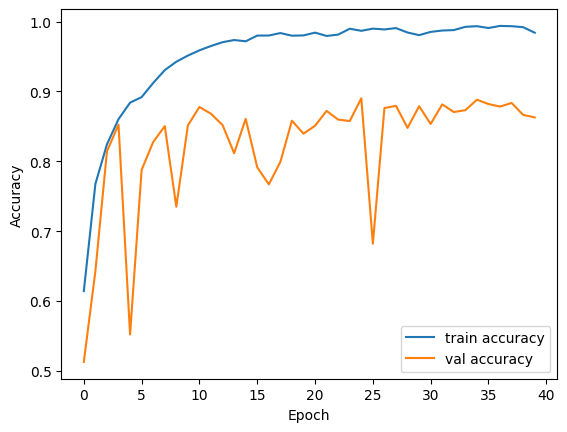

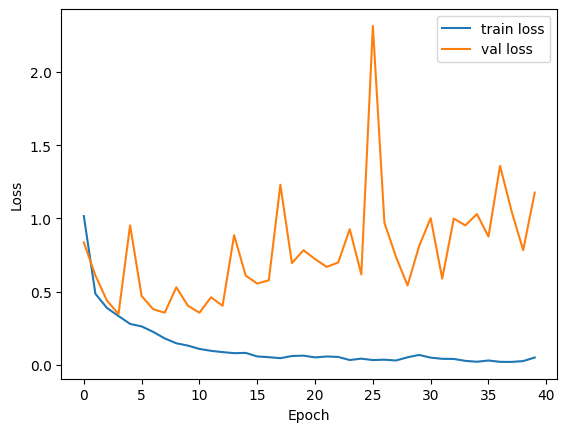

In [28]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


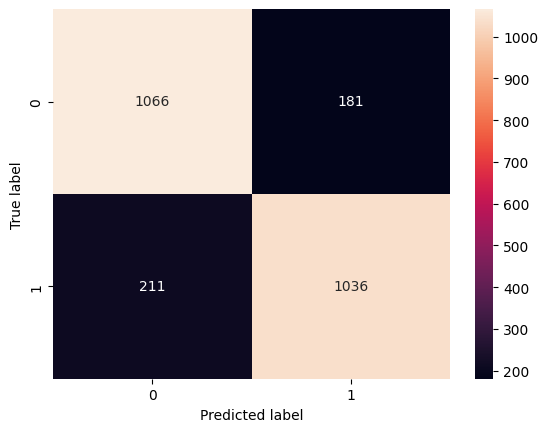

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
